In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [2]:
T=1000
time=torch.arange(1,T+1,dtype=torch.float32)
time

tensor([   1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,    9.,   10.,
          11.,   12.,   13.,   14.,   15.,   16.,   17.,   18.,   19.,   20.,
          21.,   22.,   23.,   24.,   25.,   26.,   27.,   28.,   29.,   30.,
          31.,   32.,   33.,   34.,   35.,   36.,   37.,   38.,   39.,   40.,
          41.,   42.,   43.,   44.,   45.,   46.,   47.,   48.,   49.,   50.,
          51.,   52.,   53.,   54.,   55.,   56.,   57.,   58.,   59.,   60.,
          61.,   62.,   63.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,
          71.,   72.,   73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,
          81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,   90.,
          91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,   99.,  100.,
         101.,  102.,  103.,  104.,  105.,  106.,  107.,  108.,  109.,  110.,
         111.,  112.,  113.,  114.,  115.,  116.,  117.,  118.,  119.,  120.,
         121.,  122.,  123.,  124.,  125.,  126.,  127.,  128., 

In [3]:
x=torch.sin(0.01*time)+torch.normal(0,0.2,(T,))
x

tensor([-3.5032e-01, -2.5839e-01,  1.3958e-01, -1.8879e-01, -5.5341e-02,
         1.5890e-01, -2.3698e-01,  8.8897e-02,  1.4845e-01,  3.6008e-01,
        -4.1702e-01,  5.7443e-03, -2.9518e-03,  2.9971e-01,  8.4984e-02,
         3.3148e-01,  3.7827e-01, -4.0015e-02,  9.5807e-03,  3.1746e-01,
         2.4942e-01,  4.4214e-01,  3.7025e-01,  1.2543e-01,  1.2647e-01,
         5.0315e-01,  5.2476e-01,  3.4683e-01, -5.1498e-02,  5.9827e-01,
         6.7881e-01,  5.0515e-01,  2.8592e-01,  4.3273e-01,  1.4656e-01,
         4.3272e-01,  4.2390e-01,  4.2988e-01,  1.7282e-01,  6.9743e-01,
         5.9556e-01,  3.1772e-01,  3.9817e-01,  2.7908e-01,  5.3397e-01,
         5.6792e-01,  6.0515e-01,  3.6054e-01,  6.1858e-01,  4.7025e-01,
         6.8526e-01,  5.9287e-01,  6.3831e-01,  6.1259e-01,  6.3606e-01,
         7.1612e-01,  3.1410e-01,  7.5273e-01,  4.0936e-01,  4.6984e-01,
         4.1346e-01,  5.6671e-01,  7.2140e-01,  7.8298e-01,  7.8287e-01,
         2.7783e-01,  4.8928e-01,  7.6399e-01,  5.5

(1.0, 1000.0)

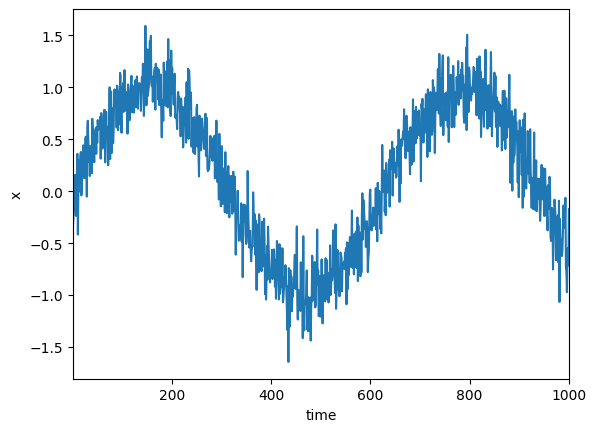

In [4]:
plt.plot(time,x)
plt.xlabel("time")
plt.ylabel("x")
plt.xlim([1,1000])

In [5]:
tau=4
features=torch.zeros((T-tau,tau))
for i in range(tau):
    features[:,i]=x[i:T-tau+i]
labels=x[tau:].reshape((-1,1))

In [6]:
batch_size=16
n_train=600

In [7]:
class MyData(Dataset):
    def __init__(self,features,labels):
        self.features=features
        self.labels=labels

    def __getitem__(self, idx):
        feature=self.features[idx]
        label=self.labels[idx]
        return feature,label

    def __len__(self):
        return len(features)

In [8]:
features=features[:n_train]
labels=labels[:n_train]

In [9]:
myData=MyData(features,labels)
train_iter=DataLoader(dataset=myData,batch_size=batch_size,shuffle=True)

In [10]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

def get_net():
    net=nn.Sequential(
        nn.Linear(4,10),
        nn.ReLU(),
        nn.Linear(10,1)
    )
    net.apply(init_weights)
    return net

loss=nn.MSELoss(reduction='none')

In [16]:

def train(net,train_iter,loss,epochs,lr):
    trainer=torch.optim.Adam(net.parameters(),lr)
    for epoch in range(epochs):
        print(f'epoch{epoch+1}')
        ls=0
        for X,y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.sum().backward()
            trainer.step()
            ls+=l.sum().item()

        print(f'mean_loss:{ls/600}')
net=get_net()


In [17]:
train(net,train_iter,loss,5,0.01)

epoch1
mean_loss:0.11796088486909867
epoch2
mean_loss:0.055054911027352015
epoch3
mean_loss:0.054216105689605075
epoch4
mean_loss:0.051991987377405166
epoch5
mean_loss:0.05104579647382101


ValueError: x and y must have same first dimension, but have shapes torch.Size([996]) and (600, 1)

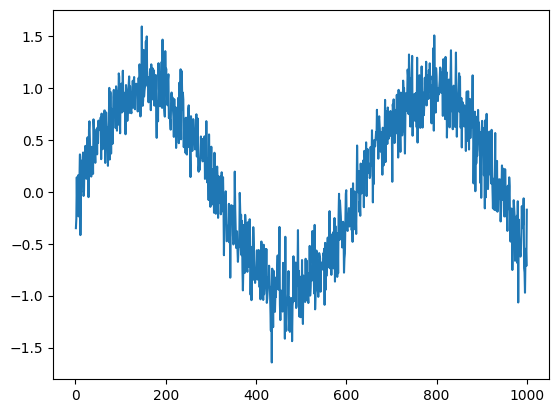

In [19]:
onestep_preds=net(features)
plt.plot(time,x.detach().numpy())
plt.plot(time[tau:],onestep_preds.detach().numpy())
plt.xlabel('time')
plt.ylabel('x')
plt.legend(['data','1-step preds'])
plt.xlim([1,1000])